<a href="https://colab.research.google.com/github/Rusii123/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_by_Raushan_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# First of all, let's **Import** the required ***libraries*** and ***modules*** 📚 ✍

In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc

import collections
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Let's mount our Drive to get the csv file , and further provide its path to get it stored in an identifier so that data stored in it can be viewed and extracted as per need .**

In [2]:
#Mounting our drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing csv file and further storing its data into an identifier
data_path = '/content/drive/MyDrive/AlmaBetter/Projects/Capstone Projects/ML Capstone Projects/Unsupervised Learning Capstone Projects /NETFLIX MOVIES AND TV SHOWS CLUSTERING -  Raushan Kumar/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [4]:
# creating a dataframe inorder to read out the Dataset from given csv file
df = pd.read_csv(data_path)

# ***Dataset Information and Summary ✅ ➿ ⏬***

In [5]:
# Viewing first 5 rows of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Viewing last 5 rows of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# Let's view some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Checking out the unique values
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
#Displaying the types of netflix records
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [10]:
#Display the unique ratings available in the dataset
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


**Conclusion ⛓ ✅ ✈ ⏬**
 * Tha dataset has 7787 observations and 12 features.
 * There are two type of Show present on the Netflix ➡ 'TV Show' and 'Movie'.
 * The oldest show present on Netflix has release year of '1925', whereas the 
   latest show has release year of 2021.  

# **Preprocessing the dataset alongwith Data cleaning to get rid of unwanted data and outliers ✅ ♟ ✂ ⚔ ⏬**


Why is it important to remove duplicate records from my data?

*  "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [12]:
# Check duplicate values
len(df[df.duplicated()])

0

Why do we need to handle missing values?

*  The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values and that's why we check missing values first

In [13]:
# Checking out the presence of any missing/null values in distinct features 
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Conclusion ⛓ ✅ ✈**There is presence of some missing values in different features(columns), and thus, to make our datasets more lucrative, we must remove any outliers and null values that appear in different rows or columns.

In [14]:
#Copying the original dataset to a backup copy before making changes to the dataset
netflix_df = df.copy()

In [15]:
netflix_df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

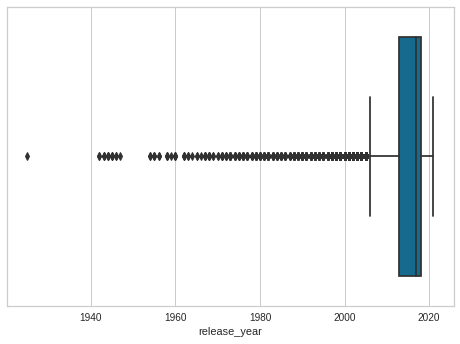

In [16]:
#release_year column before removing the outliers
sns.boxplot(df['release_year'])

In [17]:
#Removing Outliers in release_year column
Q1 = np.percentile(netflix_df['release_year'],25)
Q2 = np.percentile(netflix_df['release_year'],50)
Q3 = np.percentile(netflix_df['release_year'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
netflix_df=netflix_df[(netflix_df.release_year<b) & (netflix_df.release_year>a)]


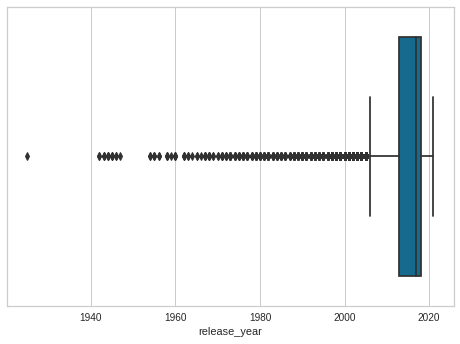

In [18]:
#release_year column after removing some of the outliers
sns.boxplot(df['release_year'])

In [19]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2294
cast             696
country          488
date_added         8
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
netflix_df["country"].value_counts()

United States                            2255
India                                     774
United Kingdom                            372
Japan                                     207
South Korea                               182
                                         ... 
Italy, Switzerland, France, Germany         1
United States, United Kingdom, Canada       1
United States, United Kingdom, Japan        1
Germany, Australia, France, China           1
United Arab Emirates, Jordan                1
Name: country, Length: 636, dtype: int64

In [21]:
# Replacing the values where the director is null with appropriate strings
netflix_df["director"] = netflix_df["director"].fillna("")
netflix_df["cast"] = netflix_df["cast"].fillna("")
netflix_df["country"] = netflix_df["country"].fillna("United States")
netflix_df["date_added"] = netflix_df["date_added"].fillna("")
netflix_df["rating"] = netflix_df["cast"].fillna("")

In [22]:
#Find the number of columns with null value for each column after making above changes
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Conclusion ⛓ ✅ ✈** Here , all the null value columns were filled with empty string for further analysis except for the country column. As, United States is the top producers of the netflix shows and movies, these empty columns were filled with 'United States' for country.

In [23]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7042 non-null   object
 1   type          7042 non-null   object
 2   title         7042 non-null   object
 3   director      7042 non-null   object
 4   cast          7042 non-null   object
 5   country       7042 non-null   object
 6   date_added    7042 non-null   object
 7   release_year  7042 non-null   int64 
 8   rating        7042 non-null   object
 9   duration      7042 non-null   object
 10  listed_in     7042 non-null   object
 11  description   7042 non-null   object
dtypes: int64(1), object(11)
memory usage: 715.2+ KB


In [24]:
netflix_df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7042.0,2016.21883,3.307937,2006.0,2015.0,2017.0,2019.0,2021.0


In [25]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,"João Miguel, Bianca Comparato, Michel Gomes, R...",4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,"Elijah Wood, John C. Reilly, Jennifer Connelly...",80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",123 min,Dramas,A brilliant group of students become card-coun...


# ***Exploratory Data Analysis***

In [26]:
# Parsing out the year and month of a a tv series and movies based on the date provided 
netflix_df ['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df ['year_added'] = netflix_df['date_added'].dt.year
netflix_df ['month_added'] = netflix_df['date_added'].dt.month

# Seperating movies from tv series, and tv series that had one, two, or more seasons 
netflix_df['season_count'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_df['duration'] = netflix_df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [27]:
#Type column count for each category
netflix_df["type"].value_counts()

Movie      4723
TV Show    2319
Name: type, dtype: int64

**Count Plot to analyze features of the dataframe**

Text(0.5, 1.0, 'Content Type')

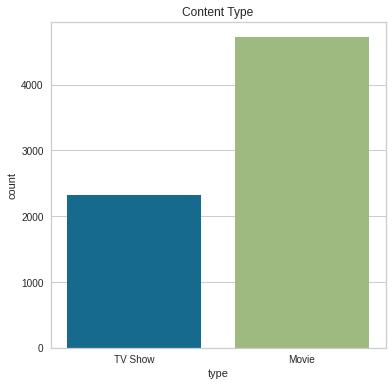

In [28]:
#analysis on type column
sns.countplot(netflix_df['type'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Content Type')

**Conclusion ⛓ ✅ ✈** Here we observed that Netflix has two types of contents on its portal ➡ 'TV show' and 'Movie', but the number of 'Movie' contents is almost double that of 'TV Show'.

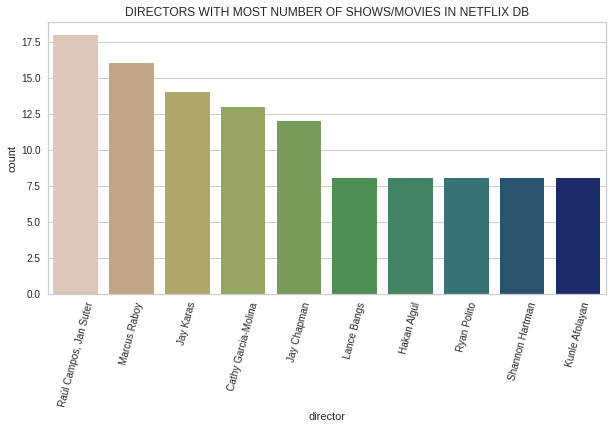

In [29]:
#analysis on director column
plt.figure(figsize = (10,5))

#excluding the missing information 
netflix_directors =netflix_df[netflix_df['director'] != '']
sns.countplot(x='director',data=netflix_directors,order=netflix_directors.director.value_counts().head(10).index,palette='gist_earth_r')
plt.title('DIRECTORS WITH MOST NUMBER OF SHOWS/MOVIES IN NETFLIX DB')
plt.xticks(rotation = 75)
plt.show()

**Conclusion ⛓ ✅ ✈** From the above plotting, we get that the director with most number of productions in our netflix dataset is 'Raul Campos & Jan suter' followed by 'Marcus Raboy'.

**Word Cloud to check the frequency of the genre of the content available in netflix**

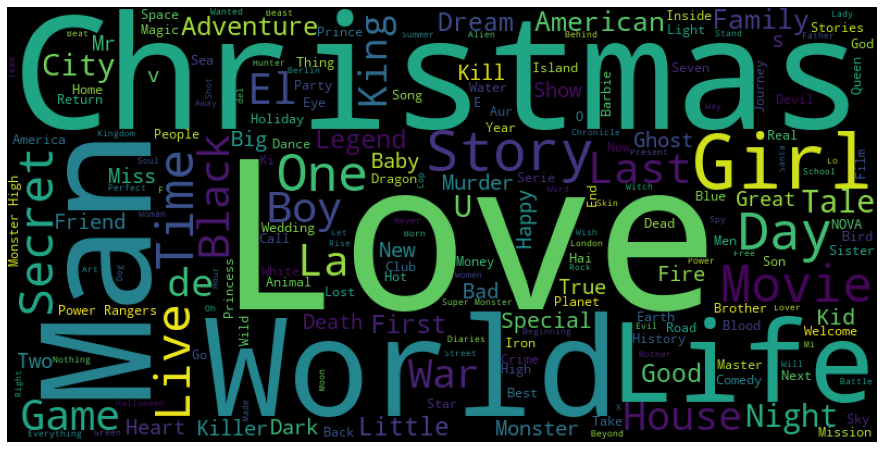

In [30]:
#Analysis on title column
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['title'])
stopwords = set(STOPWORDS)

# Generate a word cloud image with most used titles
title_cloud = WordCloud(stopwords=stopwords, background_color="black",width=800, height=400).generate(title_words)
plt.imshow(title_cloud)
plt.axis("off")
plt.show()

**Conclusion ⛓ ✅ ✈** Here, we observed that  **Christmas, Love, World, Life, Girl and Man** are the most utilized words for movie titles.

# ***Now Let's Visualize some analysis  📊 💹 📉 📈 📸***

### **Cast Column**

In [31]:
#analysis on cast column
#excluding the missing information 
netflix_cast =netflix_df[netflix_df['cast'] != '']
netflix_cast["cast"].value_counts()

David Attenborough                                                                                                        17
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Kevin Hart                                                                                                                 6
                                                                                                                          ..
Jen Taylor, Steve Downes, Michelle Lukes, Britt Baron, Travis Willingham, John Bently, Todd Haberkorn, Cole Jensen         1
Andy McAvin, James Faulkner, Luci Christian, John Swasey                                                                   1


⏯ On analyzing the above obtained information, we came to know that the cast details include the main actors of each movie or TV show. Therefore, each record can contain one or more actors and that is why, we have to put this information to another list to see which actor has the most number of shows/movies listed in this dataset.

In [32]:
#Moving each entry to a new list
cast_list = list(netflix_cast['cast'])

#Moving the actor names as separate elements in the list 
cast_list_new =[x for xs in cast_list for x in xs.split(',')]

#Making a dictionary with the above list with the number of times the actors name appears in the dataset as the key
cast_list_count = collections.Counter(cast_list_new)
cast_list_count

Counter({'João Miguel': 1,
         ' Bianca Comparato': 2,
         ' Michel Gomes': 1,
         ' Rodolfo Valente': 1,
         ' Vaneza Oliveira': 1,
         ' Rafael Lozano': 1,
         ' Viviane Porto': 1,
         ' Mel Fronckowiak': 1,
         ' Sergio Mamberti': 1,
         ' Zezé Motta': 1,
         ' Celso Frateschi': 1,
         'Demián Bichir': 1,
         ' Héctor Bonilla': 1,
         ' Oscar Serrano': 1,
         ' Azalia Ortiz': 1,
         ' Octavio Michel': 1,
         ' Carmen Beato': 3,
         'Tedd Chan': 1,
         ' Stella Chung': 1,
         ' Henley Hii': 5,
         ' Lawrence Koh': 1,
         ' Tommy Kuan': 1,
         ' Josh Lai': 1,
         ' Mark Lee': 2,
         ' Susan Leong': 2,
         ' Benjamin Lim': 1,
         'Elijah Wood': 1,
         ' John C. Reilly': 5,
         ' Jennifer Connelly': 1,
         ' Christopher Plummer': 6,
         ' Crispin Glover': 3,
         ' Martin Landau': 2,
         ' Fred Tatasciore': 17,
         ' Alan Opp

In [33]:
#Changing the dictionary to a dataframe
cast_list_count = pd.DataFrame.from_dict(cast_list_count, orient='index', columns=['count'])
cast_list_count

,count
João Miguel,1
Bianca Comparato,2
Michel Gomes,1
Rodolfo Valente,1
Vaneza Oliveira,1
...,...
Anita Shabdish,1
Chittaranjan Tripathy,1
Nasty C,1
Adriano Zumbo,1


In [34]:
#Top 20 entries
cast_list_count.nlargest(20,['count'])

,count
Takahiro Sakurai,28
Anupam Kher,24
Andrea Libman,24
Yuki Kaji,23
Vincent Tong,22
Boman Irani,20
Akshay Kumar,20
Ai Kayano,18
Junichi Suwabe,18
Fred Tatasciore,17


In [35]:
#Sorting the dataframe in the descending order
cast_list_count = cast_list_count.sort_values('count', ascending=False)
cast_list_count.reset_index(inplace=True)

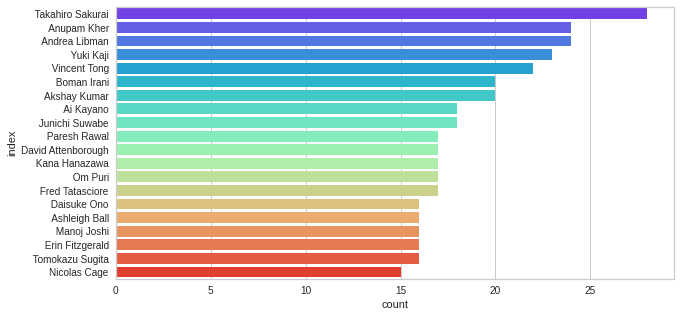

In [36]:
#Plottng a bargraph for the above analysis
plt.figure(figsize=(10,5))
sns.barplot(y="index", x="count", data=cast_list_count.nlargest(20,['count']),palette="rainbow")

**Conclusion ⛓ ✅ ✈** Now, On the basis of above plotting , we can say that **Anupam Kher** is the actor with most number of productions with his name on the cast list.

### **Country**

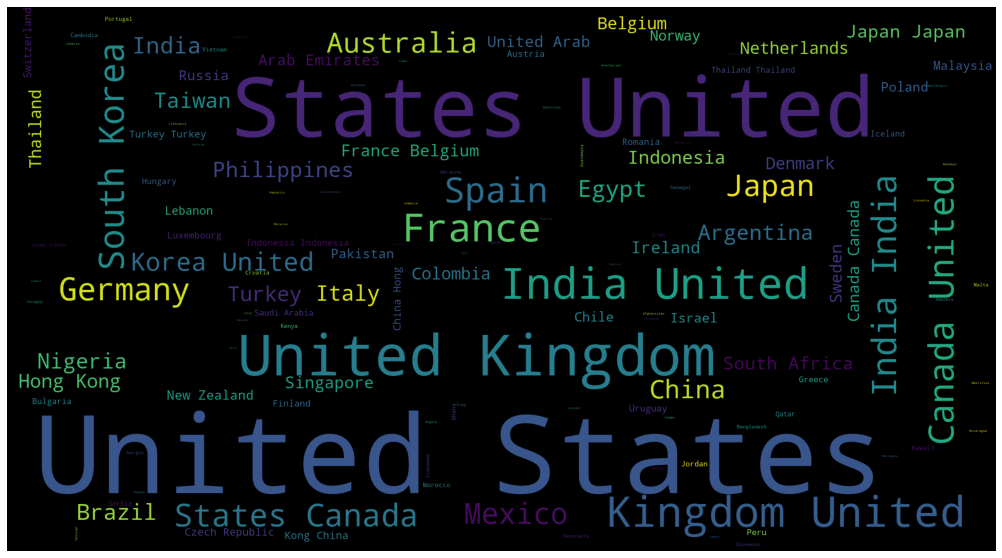

In [37]:
#Word cloud to check the most common countries
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix_df[netflix_df['country']!='Not known'].country))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# function to get country names for different content type

def column_values(netflix_data):
  netflix_data['country'].value_counts().index.values
  all_countries = ""
  for i in netflix_data['country'].value_counts().index.values:
    all_countries  = all_countries + "," + i
  all_countries = all_countries.split(',')
  countries = [s.strip() for s in all_countries]
  countries = np.unique(countries)
  countries = list(countries)

  countries.pop(0)
  return countries

In [39]:
# calling function for data which contains only movies related records
# Unique country list for content type as Movies will be returned

movie_countries = column_values(netflix_df[netflix_df['type']== "Movie"])
print("Total no of countries in dataset for content type as movies: ",len(movie_countries))
print("unique country list for Movie content type : \n ")
print(movie_countries)

Total no of countries in dataset for content type as movies:  106
unique country list for Movie content type : 
 
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia

In [40]:
# calling function for data which contains only Tv show related records
# Unique country list for content type as Tv Show will be returned

tv_show_countries = column_values(netflix_df[netflix_df['type']== "TV Show"])
print("Total no of countries in dataset for content type as Tv shows:\n \n ",len(tv_show_countries))
print("unique country list for Movie content type : \n ")
print(tv_show_countries)

Total no of countries in dataset for content type as Tv shows:
 
  64
unique country list for Movie content type : 
 
['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Lebanon', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Philippines', 'Poland', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']


In [41]:
# printing the common countries having both content type

print("Common countries for Tv shows and movie content both:")
print(len(list(set(movie_countries).intersection(tv_show_countries))),'countries \n \n',list(set(movie_countries).intersection(tv_show_countries)))

Common countries for Tv shows and movie content both:
57 countries 
 
 ['Mexico', 'Poland', 'Nigeria', 'Colombia', 'Czech Republic', 'Australia', 'Uruguay', 'Iceland', 'Thailand', 'Pakistan', 'Germany', 'Netherlands', 'Ireland', 'Malta', 'Kuwait', 'United Arab Emirates', 'Russia', 'Chile', 'Philippines', 'Hong Kong', 'Singapore', 'France', 'Greece', 'Austria', 'Indonesia', 'Luxembourg', 'Senegal', 'Finland', 'Italy', 'Ukraine', 'China', 'Lebanon', 'Taiwan', 'Spain', 'Turkey', 'Norway', 'New Zealand', 'Sweden', 'United Kingdom', 'Belgium', 'Jordan', 'Argentina', 'Egypt', 'Saudi Arabia', 'South Korea', 'Canada', 'India', 'Hungary', 'South Africa', 'Israel', 'Japan', 'Switzerland', 'Denmark', 'United States', 'Malaysia', 'Brazil', 'Croatia']


In [42]:
# printing countries which contains only movie related content

onlymovie_countries = [x for x in movie_countries if x not in tv_show_countries]
print("No of countries with only movie type content ",len(onlymovie_countries))
print("List of countries with movie type content only \n",onlymovie_countries)

No of countries with only movie type content  49
List of countries with movie type content only 
 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda', 'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Dominican Republic', 'Ecuador', 'Georgia', 'Ghana', 'Guatemala', 'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania', 'Malawi', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Qatar', 'Romania', 'Samoa', 'Serbia', 'Slovakia', 'Slovenia', 'Somalia', 'Sri Lanka', 'Sudan', 'Uganda', 'Vatican City', 'Venezuela', 'Vietnam', 'Zimbabwe']


In [43]:
# printing countries which contains only Tv show related content

onlytvshow_countries = [x for x in tv_show_countries if x not in movie_countries]
print("No of countries with only Tv show type content",len(onlytvshow_countries))

No of countries with only Tv show type content 7


**Bar plot to check the content type across some of the countries**

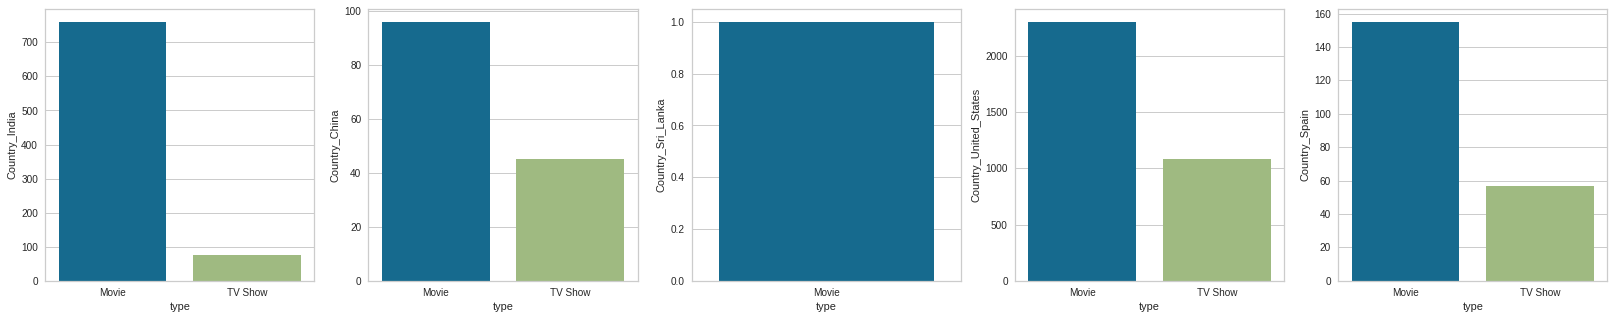

In [44]:
# visualizing content type country wise

fig, ax = plt.subplots(1,5, figsize=(28,5))
indian_content = netflix_df[netflix_df['country'].str.contains('India')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_India'},inplace =True)
sns.barplot(x='type',y= 'Country_India',data=indian_content,ax=ax[0])

China_content = netflix_df[netflix_df['country'].str.contains('China')]
China_content =pd.DataFrame(China_content.groupby('type')['country'].count()).reset_index()
China_content.rename(columns ={'country':'Country_China'},inplace =True)
sns.barplot(x='type',y= 'Country_China',data=China_content,ax=ax[1])

SriLanka_content = netflix_df[netflix_df['country'].str.contains('Sri Lanka')]
SriLanka_content =pd.DataFrame(SriLanka_content.groupby('type')['country'].count()).reset_index()
SriLanka_content.rename(columns ={'country':'Country_Sri_Lanka'},inplace =True)
sns.barplot(x='type',y= 'Country_Sri_Lanka',data=SriLanka_content,ax=ax[2])

United_States_content = netflix_df[netflix_df['country'].str.contains('United States')]
United_States_content =pd.DataFrame(United_States_content.groupby('type')['country'].count()).reset_index()
United_States_content.rename(columns ={'country':'Country_United_States'},inplace =True)
sns.barplot(x='type',y= 'Country_United_States',data=United_States_content,ax=ax[3])

Spain_content = netflix_df[netflix_df['country'].str.contains('Spain')]
Spain_content =pd.DataFrame(Spain_content.groupby('type')['country'].count()).reset_index()
Spain_content.rename(columns ={'country':'Country_Spain'},inplace =True)
sns.barplot(x='type',y= 'Country_Spain',data=Spain_content,ax=ax[4])



### **Release Year**

In [45]:
#Analysis on release year
netflix_df["release_year"].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
2015     541
2014     334
2013     267
2012     219
2010     173
2011     166
2009     137
2008     125
2006      85
2007      85
2021      31
Name: release_year, dtype: int64

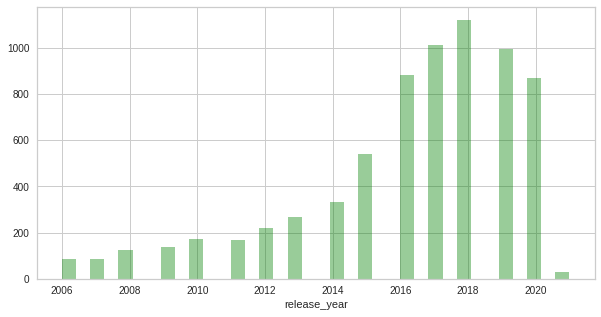

In [46]:
#overall year of release analysis
plt.figure(figsize=(10,5))
sns.distplot(netflix_df["release_year"],kde=False, color="green")

**Conclusion ⛓ ✅ ✈** Here, we came to know that Netflix database has most of the contents released during the last decade **(2010 - 2020 )**, also, Netflix contains maximum number of its contents from the release year **2018** followed by **2017 & 2019**.

### **Genres**

In [47]:
# checking different genre mentioned in 'listed in' column of dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
netflix_df['listed_in'].value_counts().index.values
all_genres = ""
for i in netflix_df['listed_in'].value_counts().index.values:
  all_genres  = all_genres + "," + i
all_genres = all_genres.split(',')
genres = [s.strip() for s in all_genres]
genres = np.unique(genres)
genres = list(genres)
print("Combined unique Genres' List : \n ")
genres.pop(0)
genres


Combined unique Genres' List : 
 


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [48]:
# creating separate columns for different genres
netflix_data = netflix_df.copy()
netflix_data['Action & Adventure'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Action & Adventure' in x  else 0)
netflix_data['Anime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Anime' in x  else 0)
netflix_data['Children & Family'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Children & Family' in x  else 0)
netflix_data['Classic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Classic' in x  else 0)
netflix_data['Comedy'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Comedy' in x or 'Comedies' in x else 0)
netflix_data['Crime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Crime' in x  else 0)
netflix_data['Documentaries'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Documentaries' in x  else 0)
netflix_data['Horror'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Horror' in x  else 0)
netflix_data['Romantic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Romantic' in x  else 0)
netflix_data['Science'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Sci-Fi' in x or 'Science' in x else 0)
netflix_data['Thriller'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Thriller' in x  else 0)
netflix_data['Drama'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Drama' in x  else 0)


In [49]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,"João Miguel, Bianca Comparato, Michel Gomes, R...",,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4,0,0,0,0,0,0,0,0,0,1,0,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,,0,0,0,0,0,0,0,0,0,0,0,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,"Elijah Wood, John C. Reilly, Jennifer Connelly...",80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,,1,0,0,0,0,0,0,0,0,1,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
# genre for movies and tv shows (content type)
print("Anime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Anime'].sum())
print("Science category wise Movie and Tv show count",netflix_data.groupby(['type'])['Science'].sum())
print("Action & Adventure category wise Movie and Tv show count",netflix_data.groupby(['type'])['Action & Adventure'].sum())
print("Children & Family category wise Movie and Tv show count",netflix_data.groupby(['type'])['Children & Family'].sum())
print("Classic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Classic'].sum())
print("Comedy category wise Movie and Tv show count",netflix_data.groupby(['type'])['Comedy'].sum())
print("Crime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Crime'].sum())
print("Horror category wise Movie and Tv show count",netflix_data.groupby(['type'])['Horror'].sum())
print("Documentaries' category wise Movie and Tv show count",netflix_data.groupby(['type'])['Documentaries'].sum())
print("Romantic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Romantic'].sum())
print("Thriller category wise Movie and Tv show count",netflix_data.groupby(['type'])['Thriller'].sum())
print("Drama category wise Movie and Tv show count",netflix_data.groupby(['type'])['Drama'].sum())


Anime category wise Movie and Tv show count type
Movie       48
TV Show    137
Name: Anime, dtype: int64
Science category wise Movie and Tv show count type
Movie      184
TV Show    154
Name: Science, dtype: int64
Action & Adventure category wise Movie and Tv show count type
Movie      550
TV Show    143
Name: Action & Adventure, dtype: int64
Children & Family category wise Movie and Tv show count type
Movie      469
TV Show      0
Name: Children & Family, dtype: int64
Classic category wise Movie and Tv show count type
Movie       1
TV Show    15
Name: Classic, dtype: int64
Comedy category wise Movie and Tv show count type
Movie      1555
TV Show     519
Name: Comedy, dtype: int64
Crime category wise Movie and Tv show count type
Movie        0
TV Show    423
Name: Crime, dtype: int64
Horror category wise Movie and Tv show count type
Movie      280
TV Show     69
Name: Horror, dtype: int64
Documentaries' category wise Movie and Tv show count type
Movie      752
TV Show      0
Name: Docu

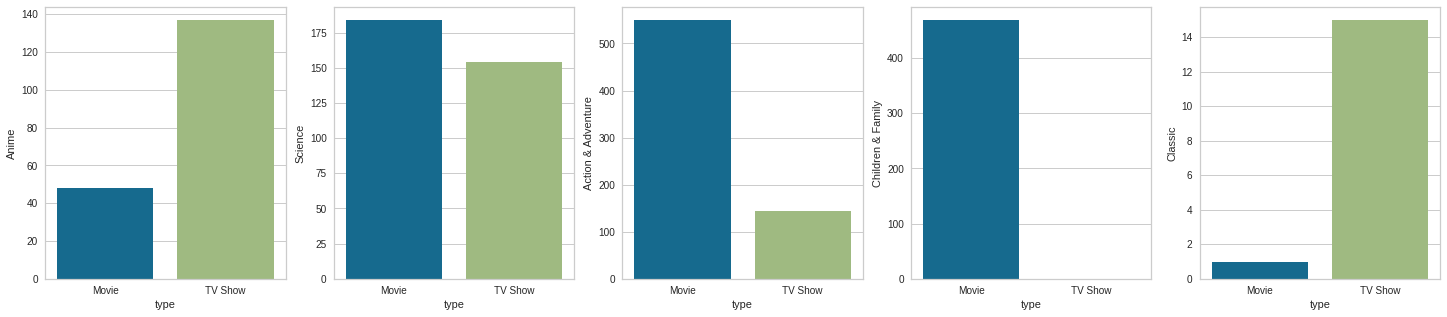

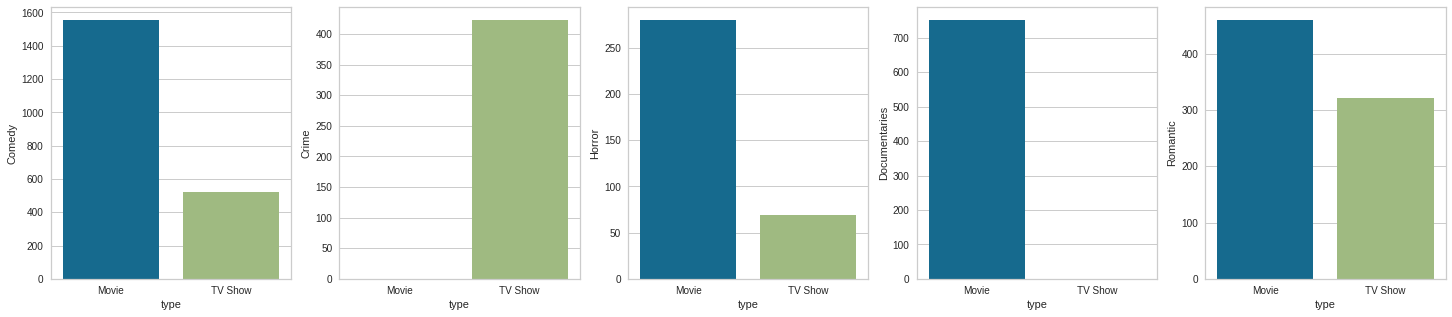

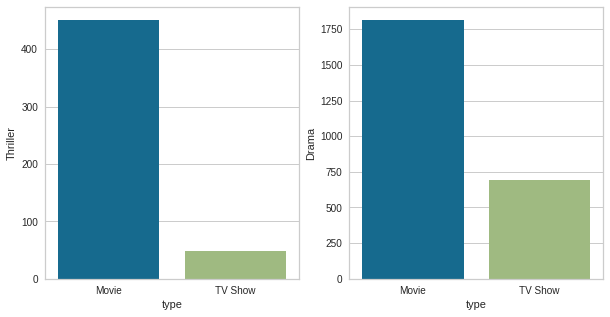

In [51]:
# visualization of the genre and respective content type count

fig, ax = plt.subplots(1,5, figsize=(25,5))
df1 =pd.DataFrame(netflix_data.groupby('type')['Anime'].sum()).reset_index()
sns.barplot(x='type',y= 'Anime',data=df1,ax=ax[0])
df2 =pd.DataFrame(netflix_data.groupby('type')['Science'].sum()).reset_index()
sns.barplot(x='type',y= 'Science',data=df2,ax=ax[1])
df3 =pd.DataFrame(netflix_data.groupby('type')['Action & Adventure'].sum()).reset_index()
sns.barplot(x='type',y= 'Action & Adventure',data=df3,ax=ax[2])
df4 =pd.DataFrame(netflix_data.groupby('type')['Children & Family'].sum()).reset_index()
sns.barplot(x='type',y= 'Children & Family',data=df4,ax=ax[3])
df5 =pd.DataFrame(netflix_data.groupby('type')['Classic'].sum()).reset_index()
sns.barplot(x='type',y= 'Classic',data=df5,ax=ax[4])

fig, axs = plt.subplots(1,5, figsize=(25,5))
df6 =pd.DataFrame(netflix_data.groupby('type')['Comedy'].sum()).reset_index()
sns.barplot(x='type',y= 'Comedy',data=df6,ax=axs[0])
df7 =pd.DataFrame(netflix_data.groupby('type')['Crime'].sum()).reset_index()
sns.barplot(x='type',y= 'Crime',data=df7,ax=axs[1])
df8 =pd.DataFrame(netflix_data.groupby('type')['Horror'].sum()).reset_index()
sns.barplot(x='type',y= 'Horror',data=df8,ax=axs[2])
df9 =pd.DataFrame(netflix_data.groupby('type')['Documentaries'].sum()).reset_index()
sns.barplot(x='type',y= 'Documentaries',data=df9,ax=axs[3])
df10 =pd.DataFrame(netflix_data.groupby('type')['Romantic'].sum()).reset_index()
sns.barplot(x='type',y= 'Romantic',data=df10,ax=axs[4])

fig, axs = plt.subplots(1,2, figsize=(10,5))
df11 =pd.DataFrame(netflix_data.groupby('type')['Thriller'].sum()).reset_index()
sns.barplot(x='type',y= 'Thriller',data=df11,ax=axs[0])
df12 =pd.DataFrame(netflix_data.groupby('type')['Drama'].sum()).reset_index()
sns.barplot(x='type',y= 'Drama',data=df12,ax=axs[1])


In [52]:
# creating separate column for checking if content is season wise or not

netflix_data['Season_wise_content'] = netflix_data['duration'].apply(lambda x: 'yes' if 'Season' in x else 'no')

In [53]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama,Season_wise_content
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,"João Miguel, Bianca Comparato, Michel Gomes, R...",,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4,0,0,0,0,0,0,0,0,0,1,0,1,no
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,,0,0,0,0,0,0,0,0,0,0,0,1,no
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,,0,0,0,0,0,0,0,1,0,0,0,0,no
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,"Elijah Wood, John C. Reilly, Jennifer Connelly...",80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,,1,0,0,0,0,0,0,0,0,1,0,0,no
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,,0,0,0,0,0,0,0,0,0,0,0,1,no


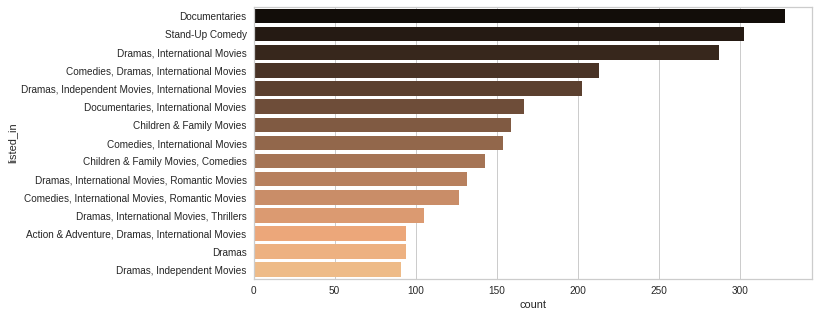

In [54]:
#Visualization of genre details of the dataset
plt.figure(figsize = (10, 5))
sns.countplot(data = netflix_df, y = 'listed_in', palette = 'copper', order = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].value_counts().index[: 15])
plt.show()


In [55]:
# function defined to find the most popular genres for some of the countries

def genre_country(country_name):
  df = netflix_df[netflix_df['country'].str.contains(country_name)]
  l1={}
  for ele in df['listed_in']:
    for el in ele.split(','):
      if el in l1.keys():
        l1[el]= l1[el] + 1
      else:
        l1[el] = 1
  l1 = dict(Counter(l1).most_common(5))
  plt.bar(range(len(l1)), list(l1.values()), align='center')
  plt.xticks(range(len(l1)), list(l1.keys()),rotation = 'vertical')
  plt.title("Most popular Genres for "+country_name)
  plt.show()    



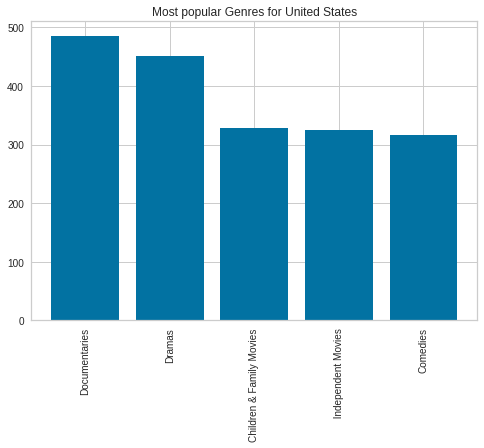

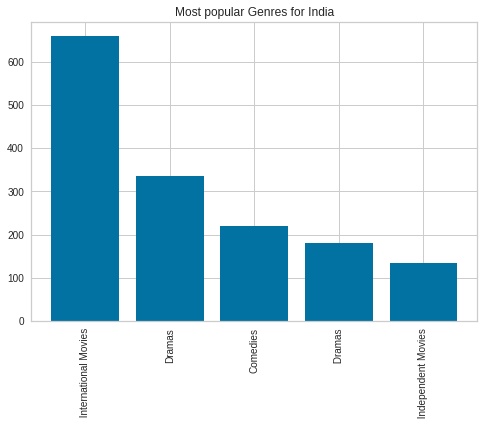

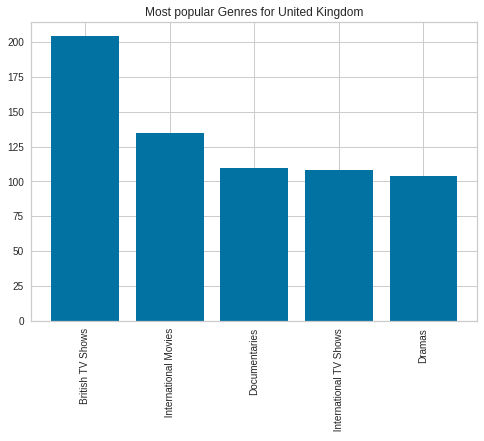

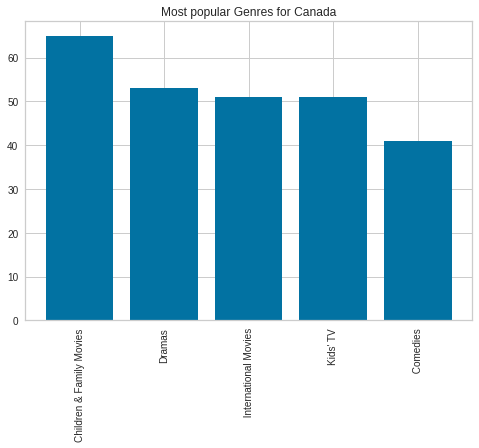

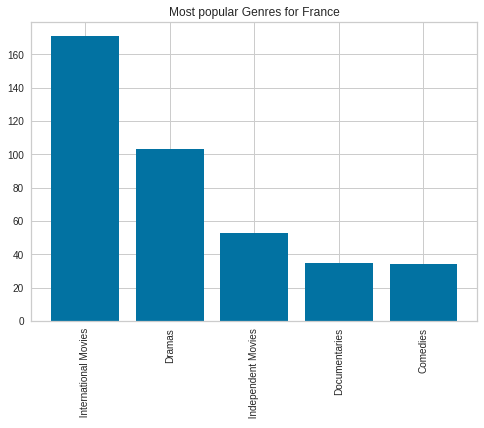

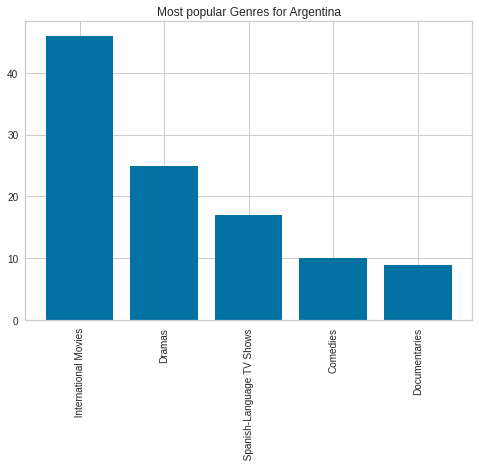

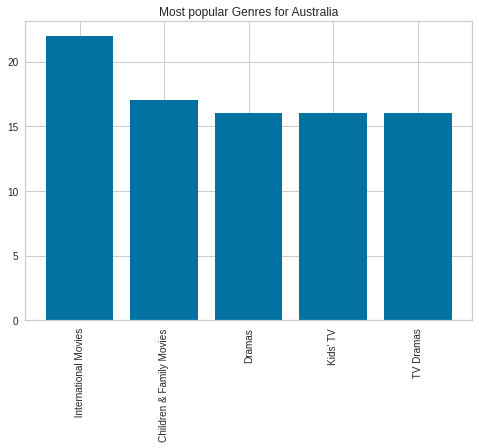

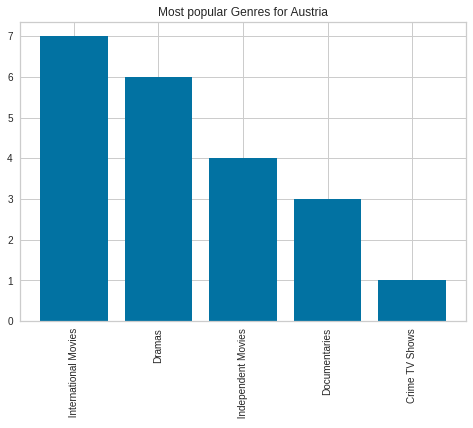

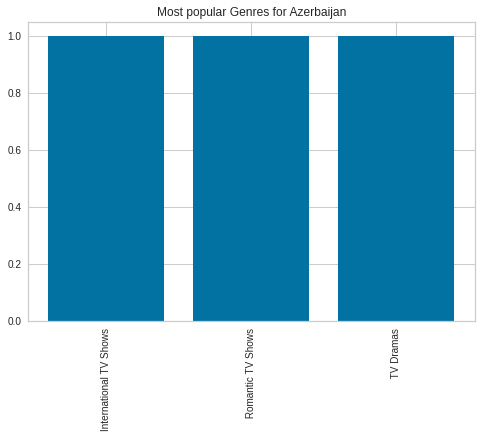

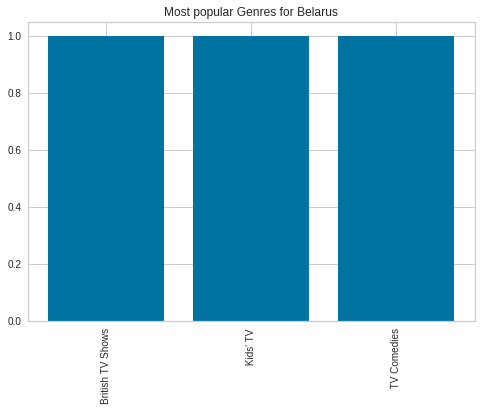

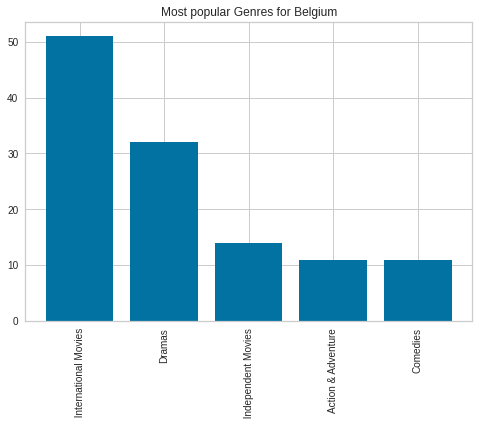

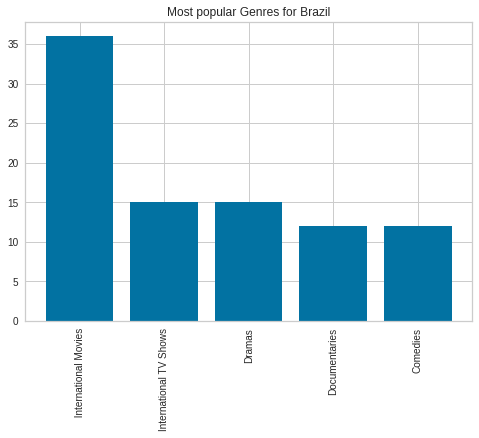

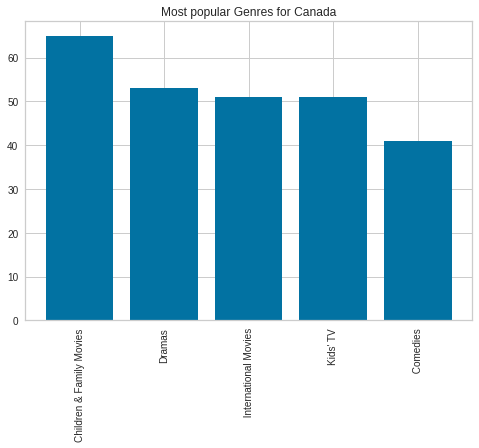

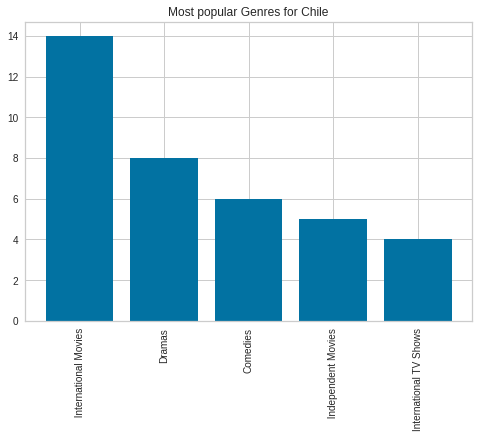

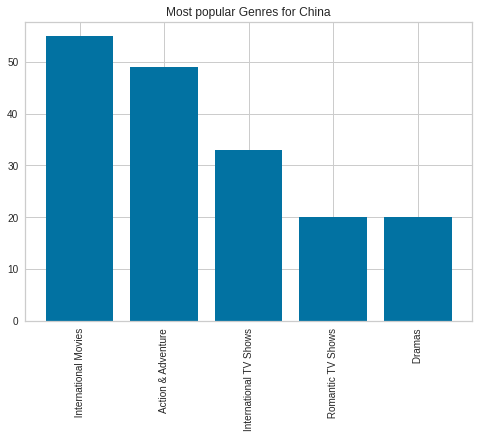

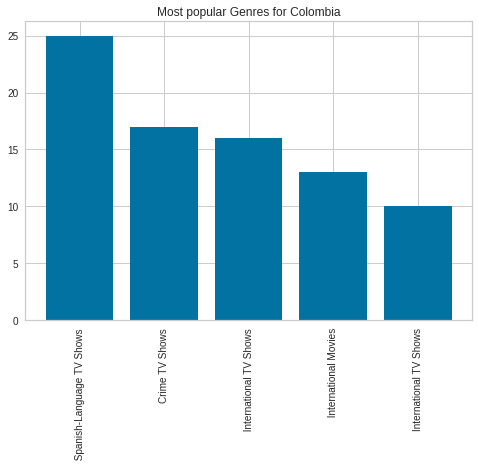

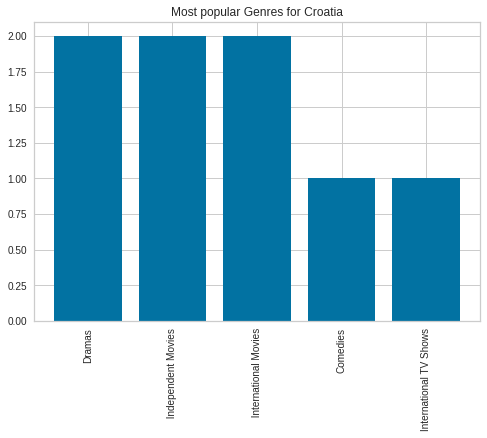

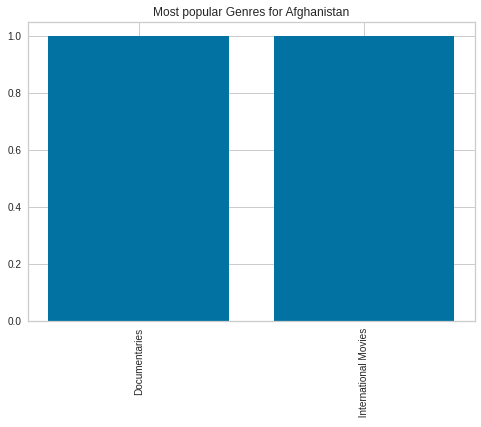

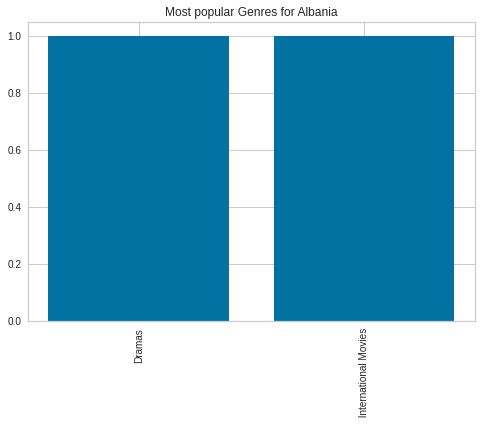

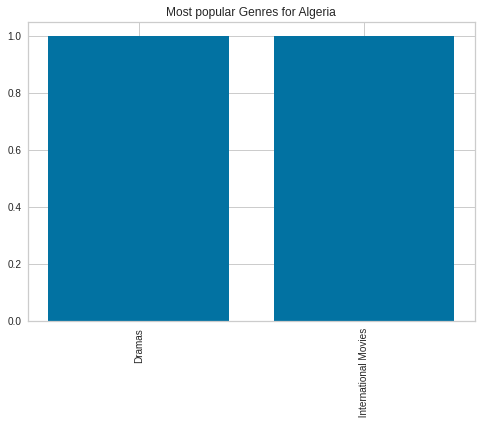

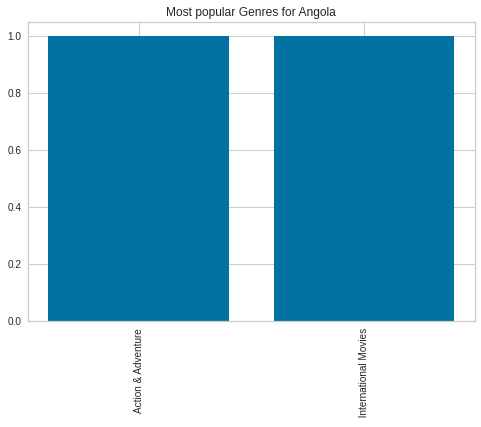

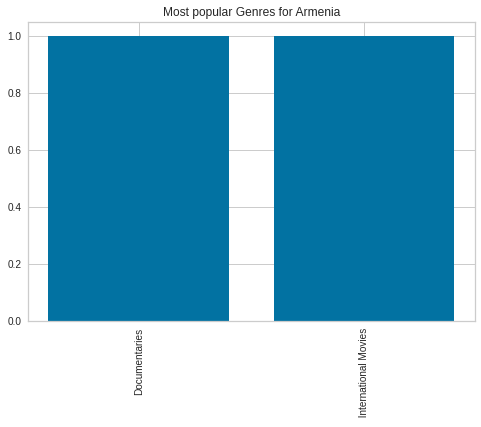

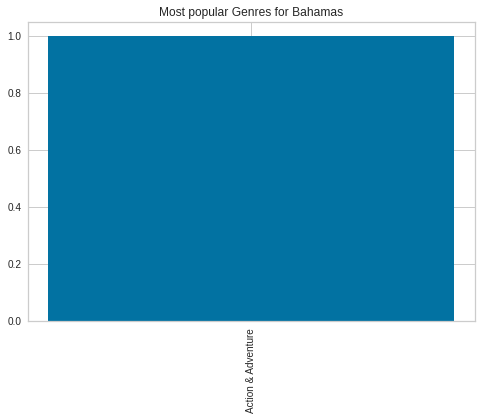

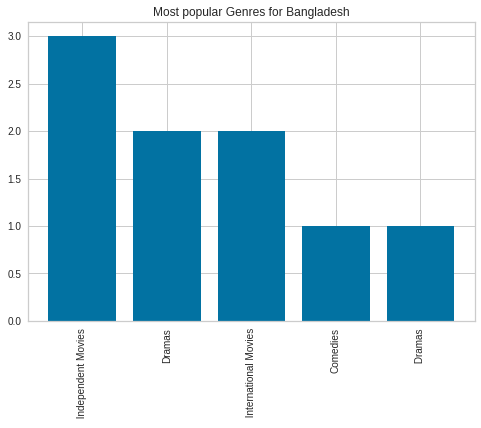

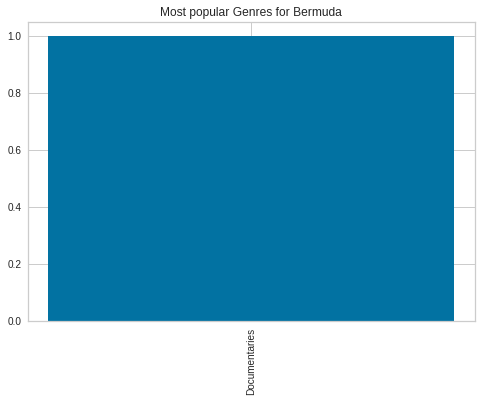

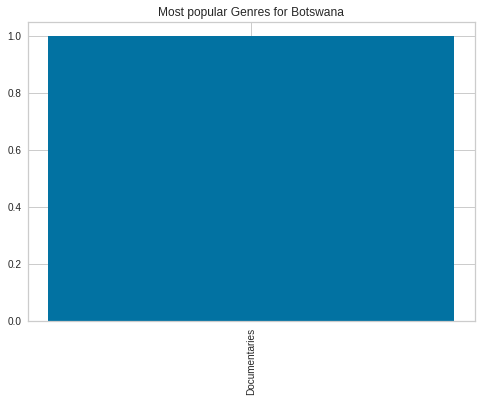

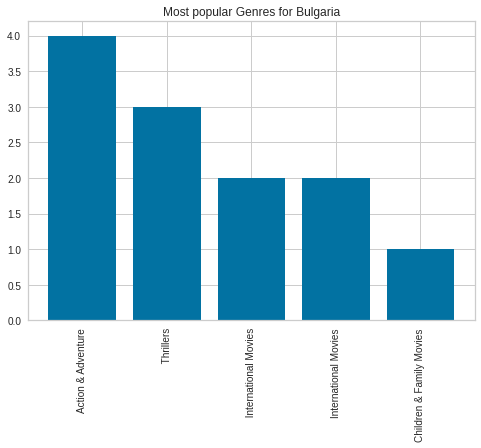

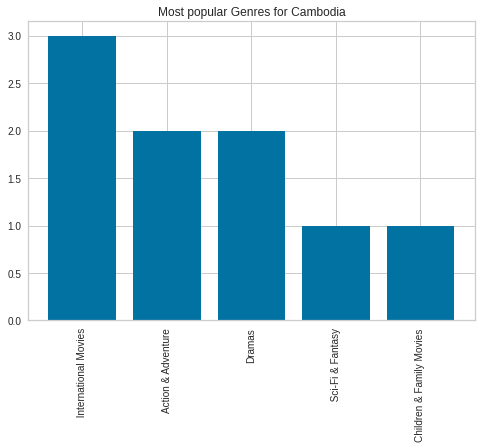

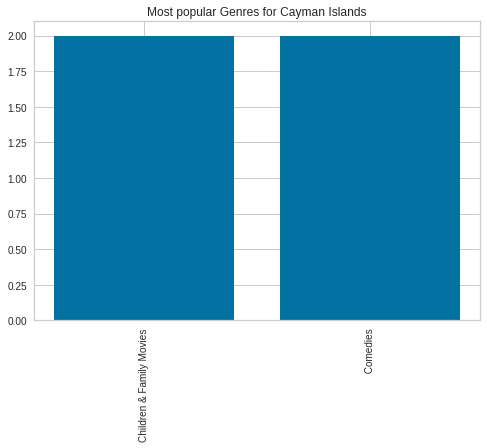

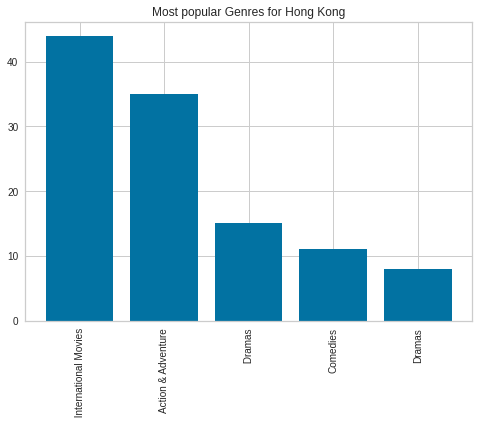

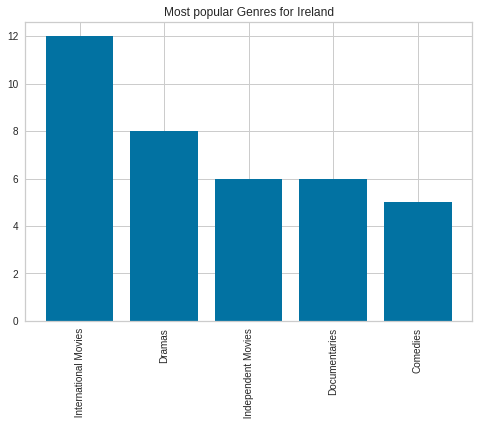

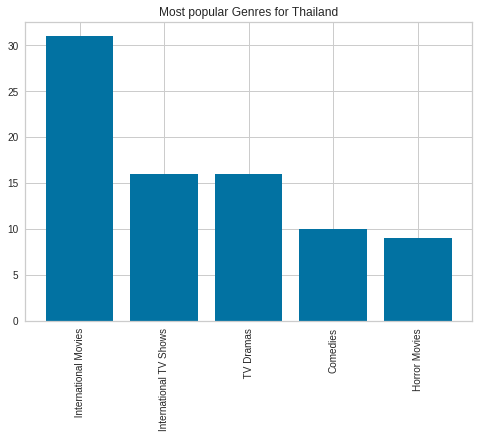

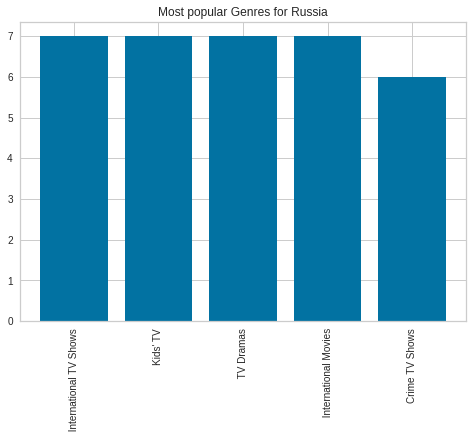

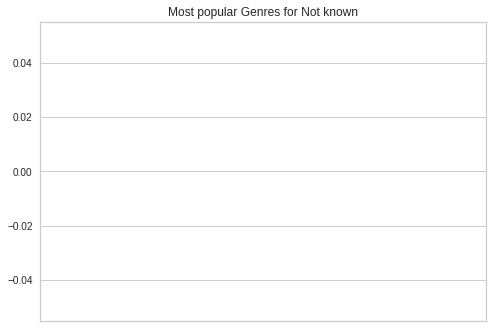

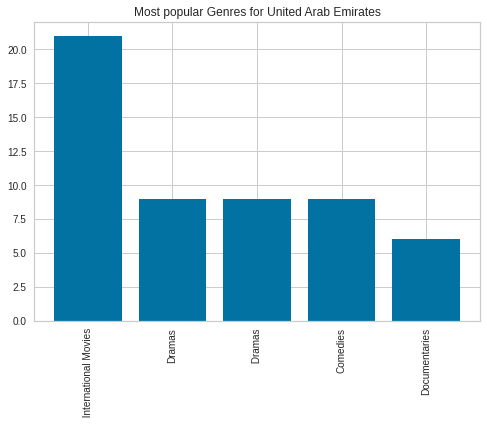

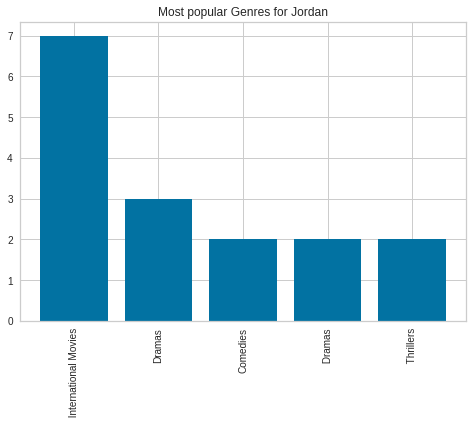

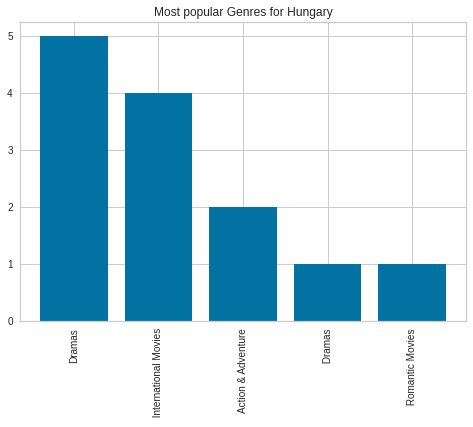

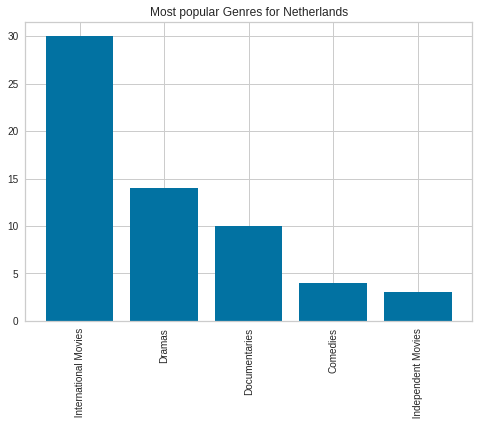

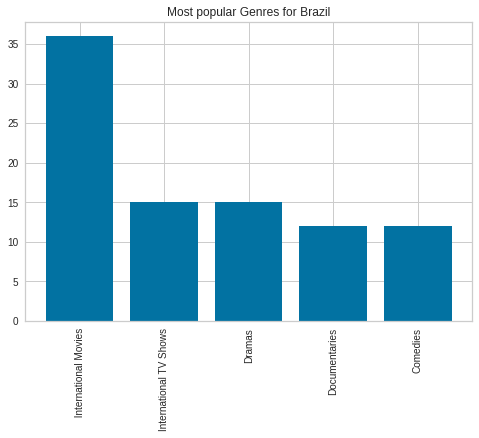

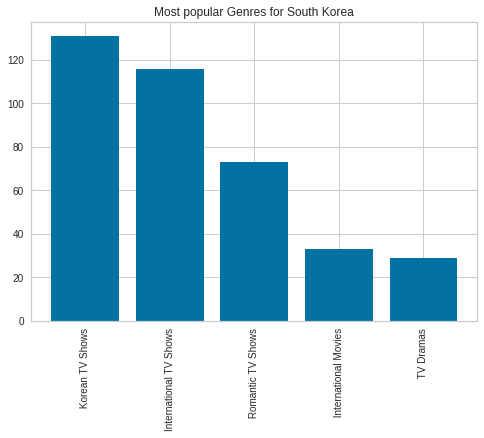

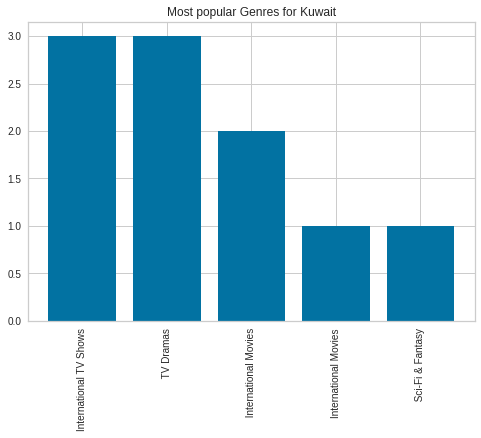

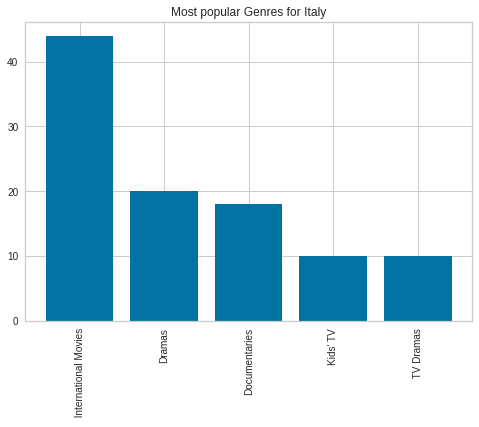

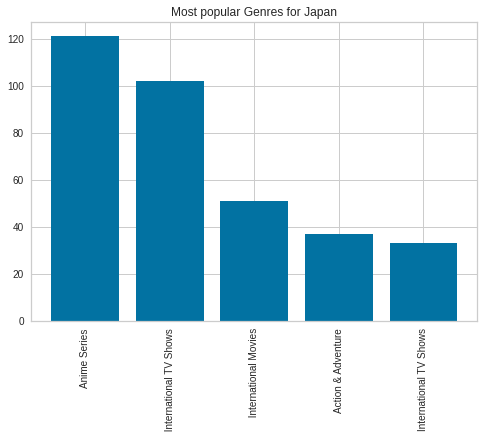

In [56]:
# plotting most popular genres for some of the countries

countries = ['United States','India','United Kingdom','Canada','France','Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia','Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda', 'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands','Hong Kong', 'Ireland', 'Thailand', 'Russia', 'Not known', 'United Arab Emirates', 'Jordan', 'Hungary', 'Netherlands', 'Brazil', 'South Korea', 'Kuwait', 'Italy', 'Japan']
for country in countries:
  genre_country(country)
 

**Conclusion ⛓ ✅ ✈ ♈**
*   United States streams mostly Dramas and Comedies.
*   India streams streams mostly International movies and Dramas.
*   United Kingdom streams mostly British TV Shows and Dramas.
*   Canada streams Comedies and Dramas the most.
*   France mostly streams International movies and Dramas.

## **HYPOTHESIS TESTING**


Our problem statement quotes : "In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled."

Let's put this theory to test.

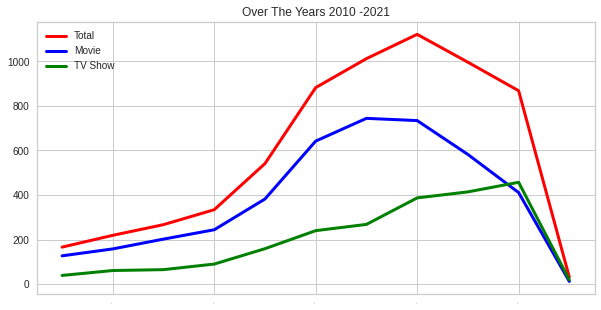

In [57]:
#Visualize the growth of netflix industry over the years
recent_years = netflix_df[netflix_df['release_year']>2010]

year_data = recent_years['release_year'].value_counts().sort_index().loc[:2021]
type_data = recent_years.groupby('release_year')['type'].value_counts().unstack().loc[:2021]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'red', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2021')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')


**Conclusion ⛓ ✅ ✈** Above graph is the representation of the movies/shows in the netflix dataset with respect to it released year.This shows the number of netflix production and their year of release.This doesnt explain whether netflix had them when the productions were released. But we can use the year_added column for this information.

In [58]:
#Checking the trends from the year 2010
recent_years_added = netflix_df[netflix_df['year_added']>2010]

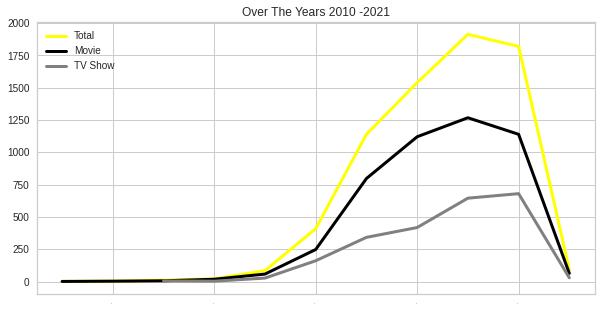

In [59]:
#Visualize the growth of netflix industry over the years

year_data = recent_years_added['year_added'].value_counts().sort_index().loc[:2021]
type_data = recent_years_added.groupby('year_added')['type'].value_counts().unstack().loc[:2021]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'yellow', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='black', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='grey', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2021')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')


**Conclusion ⛓ ✅ ✈** We can see that there is a steady decline of production irrespective of the type (movie or show). This could be because the dataset include details of the year 2021 which is the ongoing year.So this year has to be excluded for our testing.

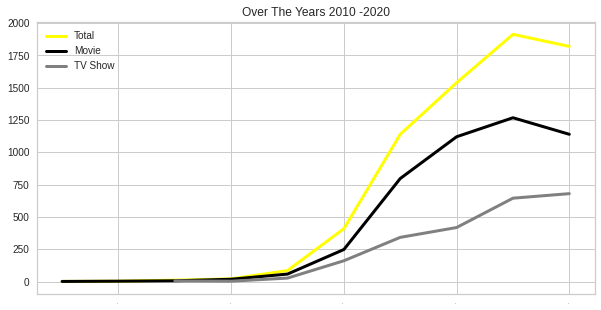

In [60]:
#Visualize the growth of netflix industry over the years

year_data = recent_years_added['year_added'].value_counts().sort_index().loc[:2020]
type_data = recent_years_added.groupby('year_added')['type'].value_counts().unstack().loc[:2020]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'yellow', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='black', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='grey', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2020')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

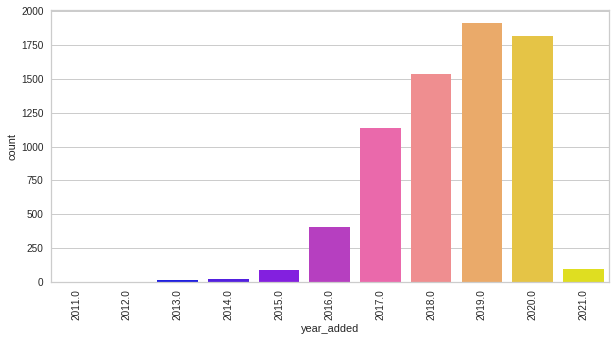

In [61]:
#overall year of release analysis
plt.figure(figsize=(10,5))
sns.countplot(recent_years_added["year_added"],palette = 'gnuplot2')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

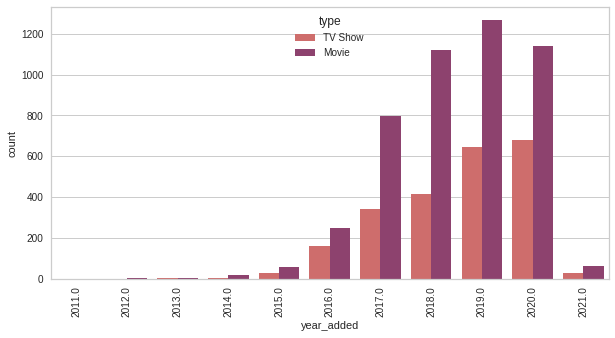

In [62]:
#overall year_added analysis
plt.figure(figsize=(10,5))
sns.countplot(recent_years_added["year_added"],hue=recent_years_added["type"],palette = 'flare')
plt.xticks(rotation = 90)

**Conclusion ⛓ ✅ ✈** Irrespective of the release years, Netflix has distribution rights for the most number of shows and movies is in the year 2019. Also, there is no decline in the number of movies.Also number if movies added has always been more than the number of tv shows added.Compared the number of tv shows streamed in the year 2010, there is steady increase in the number of tv shows streamed in the year 2019.

In [63]:
 #count of tv shows streamed during th eyears 2010 to 2021

 recent_years_added_tv = recent_years_added[recent_years_added['type'] == 'TV Show']
 recent_years_added_tv.year_added.value_counts()
 

2020.0    680
2019.0    645
2018.0    418
2017.0    342
2016.0    161
2021.0     29
2015.0     27
2013.0      5
2014.0      3
Name: year_added, dtype: int64

**Conclusion ⛓ ✅ ✈ ♈** 

**HYPOTHESIS**:The number of TV shows on Netflix has nearly tripled since   2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

**INFERENCE** : As seen above, the number of TV shows has tripled since 2010. But there is no decline in the number of movies streamed.
So we can conclude that the above hypothesis is rejected though partially true.

# **Text Based Clustering**

In [64]:
#dataset copied for clustering
netflix = netflix_df.copy()

In [65]:
# checking dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,"João Miguel, Bianca Comparato, Michel Gomes, R...",,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,"Elijah Wood, John C. Reilly, Jennifer Connelly...",80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


In [66]:
# combining textual columns

netflix['combined_text'] = netflix['description']+netflix['listed_in']+netflix['rating']+netflix['director']+netflix['cast']+netflix['country']

In [67]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,combined_text
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,"João Miguel, Bianca Comparato, Michel Gomes, R...",,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,"Elijah Wood, John C. Reilly, Jennifer Connelly...",80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,,A brilliant group of students become card-coun...


In [68]:
# function to change data to lowercase and perform pattern change
def textpattern(text):
  return re.sub(r"[^a-zA-Z ]","",str(text)).lower()

In [69]:
# converting to lower case and basic pattern change to clean data

netflix['combined_text'] = netflix['combined_text'].apply(textpattern)

In [74]:
# stop words

stemmer = SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

stopwords

AttributeError: ignored

In [75]:
# function to perform stemming of the words and remove stop words

def filter(text, stopwords):
    cleaned = []
    tokens = word_tokenize(text) 
    for word in tokens:
        if word not in stopwords:
            cleaned.append(stemmer.stem(word))
    return " ".join(cleaned)
cleaned_text = []
for row in netflix.iterrows():
    cleaned_text.append(filter(row[1]['combined_text'],stopwords))
  
cleaned_text[0]

'futur elit inhabit island paradis far crowd slum one chanc join save squalorintern tv show tv drama tv scifi fantasyjoo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschijoo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschibrazil'

In [76]:
# cleaned data
filtered_text = pd.Series(cleaned_text)

In [77]:
#using tfidf transforming data

tfidf = TfidfVectorizer(max_df = 0.9,min_df = 1,max_features=12000)
x= tfidf.fit_transform(filtered_text)

x


<7042x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 172158 stored elements in Compressed Sparse Row format>

### **DIMENSIONALITY REDUCTION**

In [78]:
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(x.toarray())

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

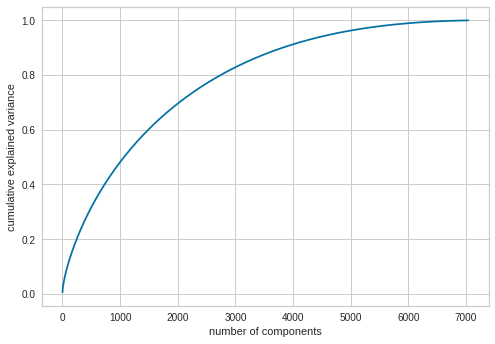

In [79]:
# Explained variance for different number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [80]:
# applying PCA to transform the data into 4000 components selected by checking the above graph . explained variance for 4000 components is around 0.9

pca = PCA(n_components=4000,random_state=42)
pca.fit(x.toarray())
transformed_data = pca.fit_transform(x.toarray())
transformed_data.shape
transformed_data

array([[ 0.07028335, -0.02162193,  0.02218298, ..., -0.00319724,
        -0.00200067,  0.00433011],
       [-0.03460266,  0.00454647, -0.01294073, ...,  0.01871785,
         0.01122288,  0.00973021],
       [-0.01371851,  0.0723545 ,  0.01998289, ..., -0.00604399,
         0.00042157, -0.00340169],
       ...,
       [-0.06204613, -0.02747781, -0.13295867, ...,  0.00444002,
         0.00309003,  0.00818047],
       [ 0.06413926, -0.03749619,  0.0086438 , ...,  0.01174068,
         0.00186563,  0.00752018],
       [-0.04557161, -0.08966234, -0.14627623, ..., -0.00032977,
         0.00408244,  0.00080605]])

### **Clustering Algorithms**

**K Means Clustering**

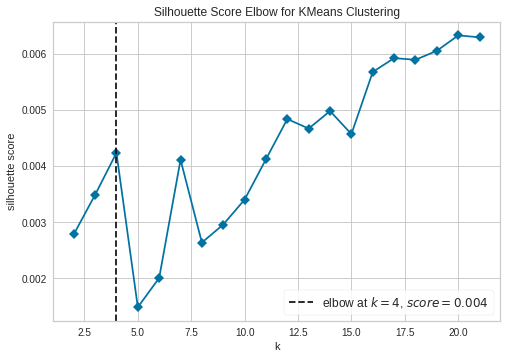

In [81]:
# finding optimal number of clusters for K Means

# Instantiate the clustering model and visualizer
model = KMeans(tol=1e-4,random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,22), metric='silhouette', timings=False)

visualizer.fit(transformed_data)
visualizer.show()  

In [82]:
# fitting kmeans to transformed data

kmeans= KMeans(n_clusters=5,max_iter=1000,tol=1e-4, n_init=1,random_state= 42)
kmeans.fit(transformed_data)

KMeans(max_iter=1000, n_clusters=5, n_init=1, random_state=42)

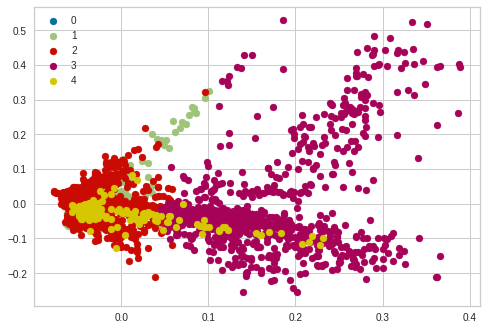

In [83]:
# plotting clusters

label = kmeans.fit_predict(transformed_data)
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(transformed_data[label == i , 0] , transformed_data[label == i , 1] , label = i)
plt.legend()
plt.show()


In [84]:
# created new column with cluster number

netflix['cluster'] = kmeans.labels_

In [85]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,combined_text,cluster
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,"João Miguel, Bianca Comparato, Michel Gomes, R...",,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4,in a future where the elite inhabit an island ...,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,,after a devastating earthquake hits mexico cit...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,,when an army recruit is found dead his fellow ...,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,"Elijah Wood, John C. Reilly, Jennifer Connelly...",80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,,in a postapocalyptic world ragdoll robots hide...,2
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,,a brilliant group of students become cardcount...,2


In [86]:
# value count for different clusters

netflix.cluster.value_counts()

2    3089
1    2210
3    1305
4     313
0     125
Name: cluster, dtype: int64

Text(0, 0.5, 'size')

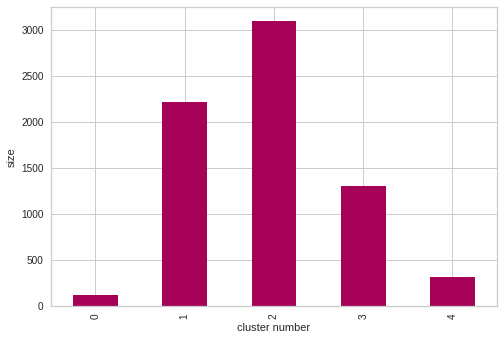

In [87]:
# Size of clusters formed

netflix.cluster.value_counts().sort_index().plot(kind='bar', color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

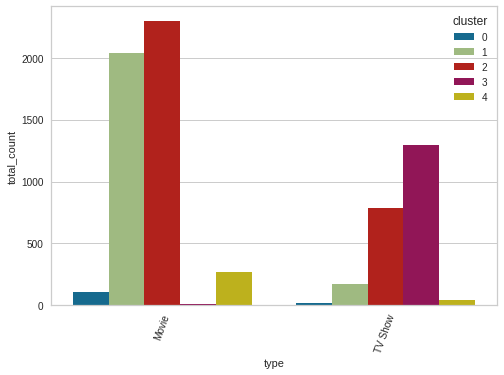

In [88]:
# plotting content type count for diferent clusters

def cluster_analysis(df,col_name):
  df1 = df.groupby(['cluster',col_name]).agg(total_count=(col_name,'count'))
  df1 = df1.reset_index()
  sns.barplot(x=col_name,y="total_count", hue="cluster",data=df1)
  plt.xticks(rotation=70)
 
cluster_analysis(netflix,'type')

In [89]:
#Evaluate the silhouette score
y = pca.fit_transform(x.toarray())
y_pred = kmeans.fit_predict(transformed_data)
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

Silhouette score is 0.004269788866664024


In [90]:
# function to create world cloud based on genres for different clusters'

def world_cloud(cluster):
  plt.subplots(figsize=(20,10))
  netflix_cluster = netflix[netflix['cluster'] == cluster]
  wordcloud = WordCloud(background_color='white', width=2000,height=1100).generate(" ".join(netflix_cluster[netflix_cluster['listed_in']!='Not known'].listed_in))                    
  plt.imshow(wordcloud)
  plt.title("Cluster "+str(cluster+1))
  plt.axis('off')
  plt.show()

***Cluster1***

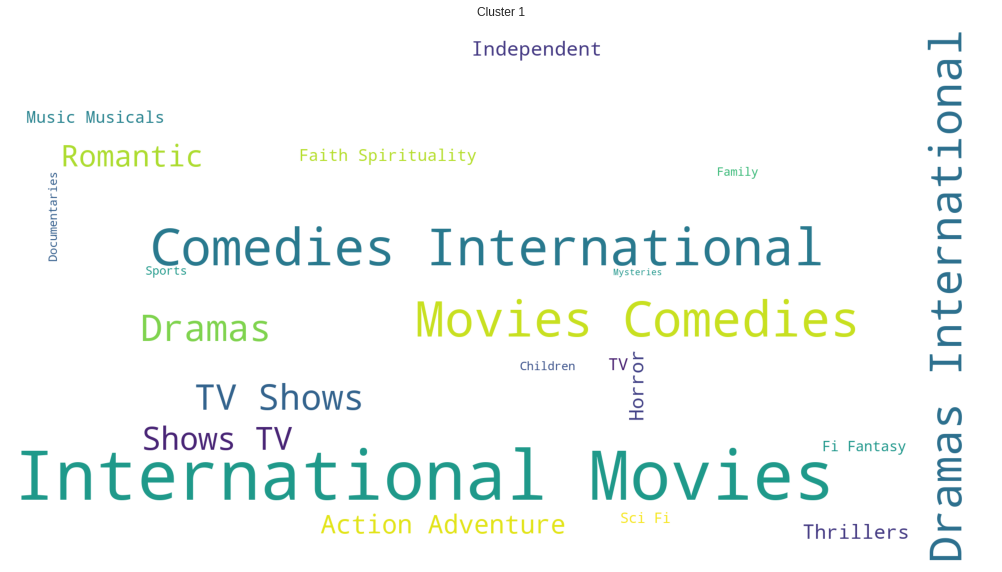

In [91]:
world_cloud(0)

***Cluster2***

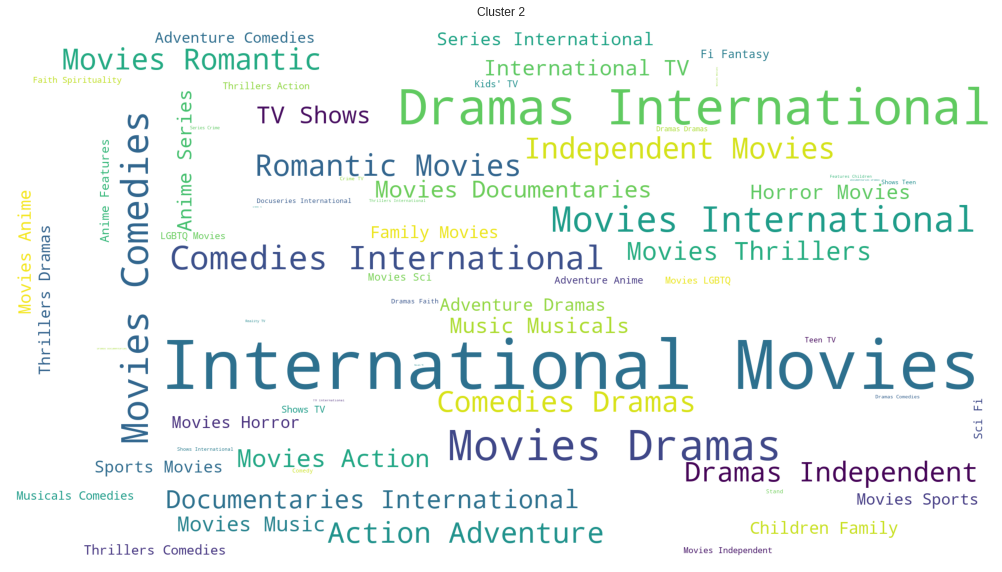

In [92]:
world_cloud(1)

***Cluster3***

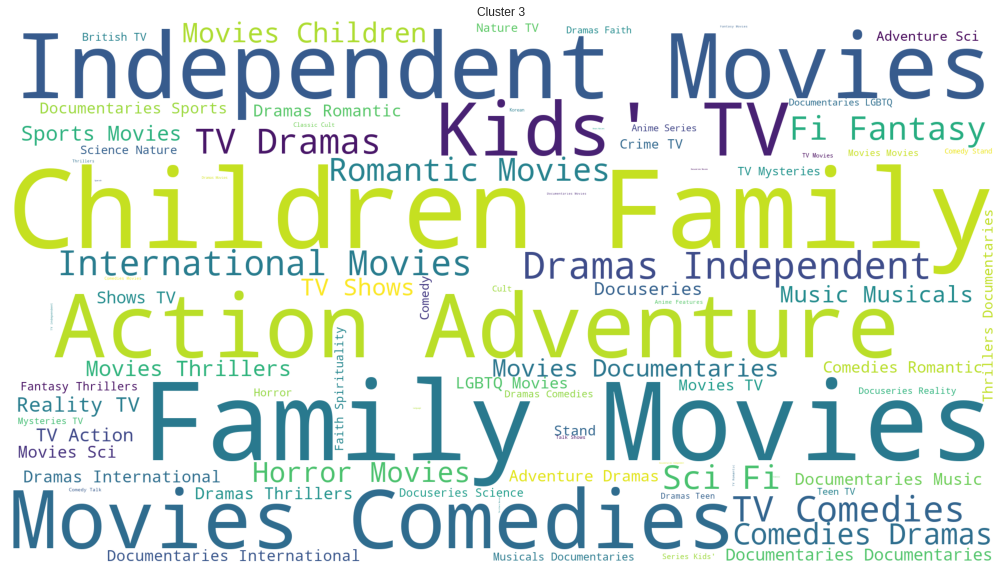

In [93]:
world_cloud(2)

***Cluster4***

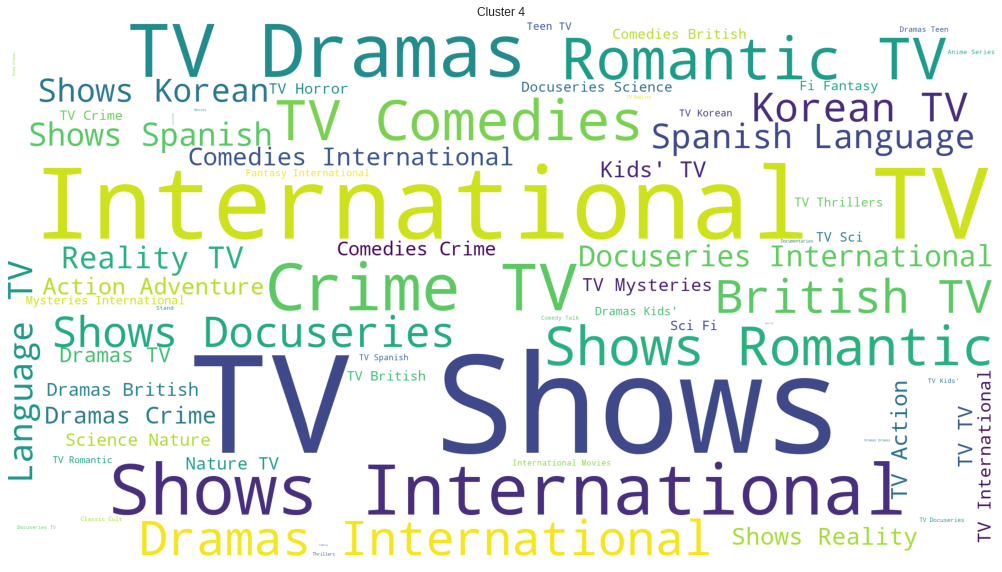

In [94]:
world_cloud(3)

***Cluster5***

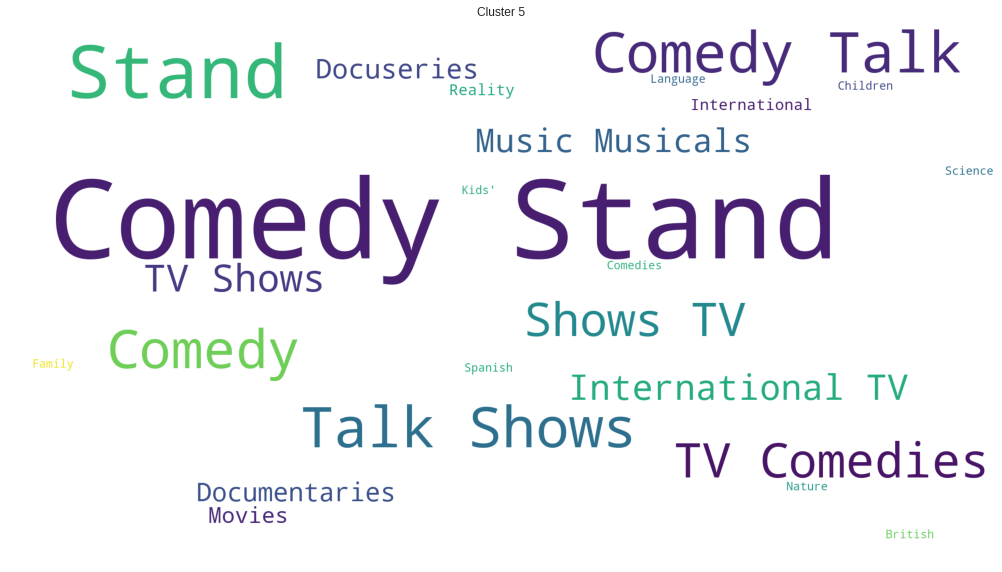

In [95]:
world_cloud(4)

# **Content Based Recommender system using Cosine Similarity**

In [96]:
#from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix 
cosine_sim= linear_kernel(x,x)

In [97]:
#Series for getting the index and title
indices = pd.Series(netflix.index,index=netflix['title']).drop_duplicates()

In [98]:
def get_recommendations(title, cosine_sim = cosine_sim):

    #get index of the matching title
    idx=indices[title]

    #get the similarity score of the similar titles
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity score
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)

    #get the similarity score of top 10 movies
    sim_scores=sim_scores[1:11]

    #get the indices 
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top indices
    return df['title'].iloc[movie_indices]

In [99]:
get_recommendations('Stranger Things')

3751                    Love Cuisine
5953                            Taal
5344                     Saint Seiya
7002                The Wishing Tree
5669                  Slobby's World
5701          Some Assembly Required
6854    The Search for Life in Space
4777                     Paris Is Us
3398                  King of Peking
5671                       Slow West
Name: title, dtype: object

In [100]:
get_recommendations('Kapoor & Sons')

975                          Bleach the Movie: Hell Verse
4194                    Monster High: Great Scarrier Reef
2135                       Fear and Loathing in Las Vegas
3279    Kabaneri of the Iron Fortress: The Battle of U...
5177                           Return To The 36th Chamber
6386                                        The Gathering
4193                            Monster High: Ghouls Rule
1100                                           Bridgerton
5606                              Silent Hill: Revelation
6949                                    The Truth Seekers
Name: title, dtype: object

In [101]:
get_recommendations('Click')

3205    John Leguizamo's Latin History for Morons
4801                            Paulettante Veedu
5729                                   Soundtrack
1683                                    Deewangee
5779                                       Spyder
4105                            Million Yen Women
6279                   The Death of Mr. Lazarescu
4345                                   My Own Man
1989    Emicida: AmarElo - It’s All For Yesterday
5063                                  Raging Bull
Name: title, dtype: object

# **Ultimate Conclusion ⏸ ➿ ✅ ✌**

*   Netflix has more movies than TV Shows

*   United States provides the most number of movies and shows followed by India and United Kingdom.

*   There is an exponential raise in the number of TV shows and movies distributed by Netflix in the recent years.

*   Text cleaning and vectorization was done on the combined features of the dataset which includes origin country, leading cast member, content type and description for clustering analysis.

* Used TF-IDF vectorizer and PCA to preprocess text data before providing to clustering algorithm

* Performed K-Means Clustering to create clusters and used silhouette score and elbow curve to find optimal number of clusters

*   Clusters are identified for each of the record in the dataset.

*   Recommendation based on cosine similiarity is also done on the same transformed data. 
